#**IMPORTING THE DEPENDENCIES**

In [4]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

#**LOADING THE DATASET**

In [5]:
# USING THE PANDAS FUNCTION TO LOAD THE DATASET
df = pd.read_csv('/content/goldstock.csv')

#**LET'S HAVE A LOOK AT OUR DATASET**

In [6]:
# LET'S SEE THE FIRST FIVE ROWS OF OUR DATASET
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [7]:
# LET'S SEE THE LAST FIVE ROWS OF OUR DATASET
df.tail()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2510,2532,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5


In [8]:
# HERE IS THE INFORMATION OF OUR DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [9]:
# ROWS AND COLUMNS IN OUR DF
df.shape

(2511, 7)

####**HERE WE CAN SEE THAT, THERE ARE NO MISSING VALUES IN OIR DATASET**

In [10]:
# CHECKING FOR MISSING VALUES IF ANY
df.isnull().sum()

Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [11]:
# LET'S SEE SOME STATISTICAL MEASURES OF OUR DATASET
df.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


#**DATA VISUALIZATION**

#**HEATMAP**

In [12]:
# LET'S SEE THE CORRELATION VALUES
correlation = df.corr()

<Axes: >

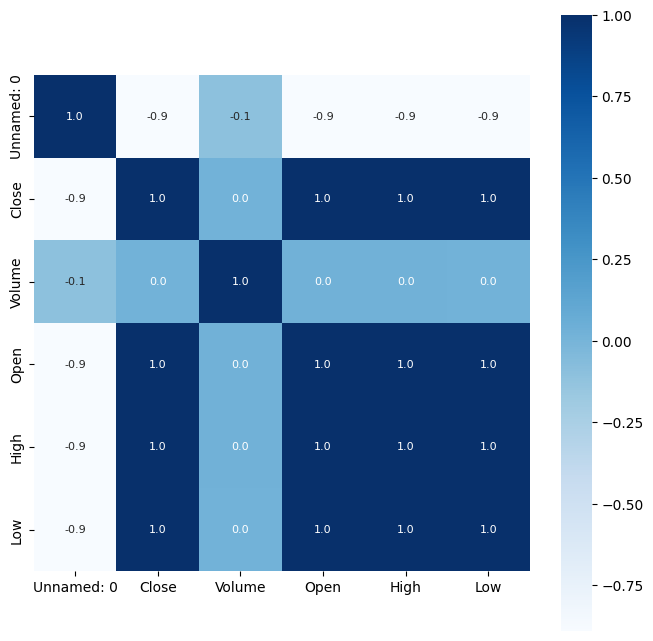

In [13]:
# PLOTTING A HEATMAP FOR THE CORRELATION VALUES
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

#**CORRELATIONS**

In [14]:
# COORELATION VALUES OF HIGH
print(correlation['High'])

Unnamed: 0   -0.888441
Close         0.999524
Volume        0.030871
Open          0.999459
High          1.000000
Low           0.999251
Name: High, dtype: float64


In [15]:
# COORELATION VALUES OF Open
print(correlation['Open'])

Unnamed: 0   -0.889586
Close         0.998994
Volume        0.027012
Open          1.000000
High          0.999459
Low           0.999386
Name: Open, dtype: float64


In [16]:
# COORELATION VALUES OF Low
print(correlation['Low'])

Unnamed: 0   -0.891092
Close         0.999576
Volume        0.018274
Open          0.999386
High          0.999251
Low           1.000000
Name: Low, dtype: float64


In [17]:
# COORELATION VALUES OF Close
print(correlation['Close'])

Unnamed: 0   -0.889680
Close         1.000000
Volume        0.022835
Open          0.998994
High          0.999524
Low           0.999576
Name: Close, dtype: float64


#**DISTPLOT**

<Axes: xlabel='Volume', ylabel='Density'>

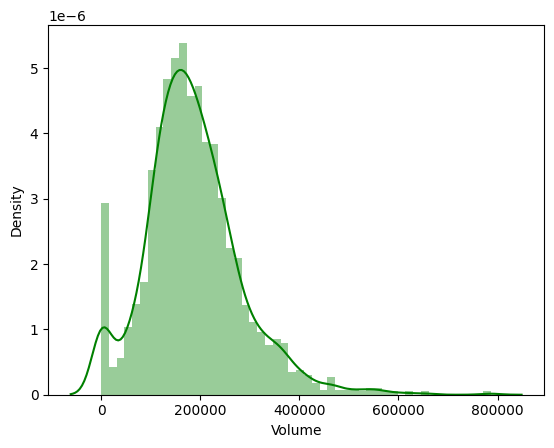

In [18]:
# CHECKING THE DISTRIBUTION OF VOLUME
sns.distplot(df['Volume'], color='green')

#**COUNTPLOT**

<Axes: ylabel='count'>

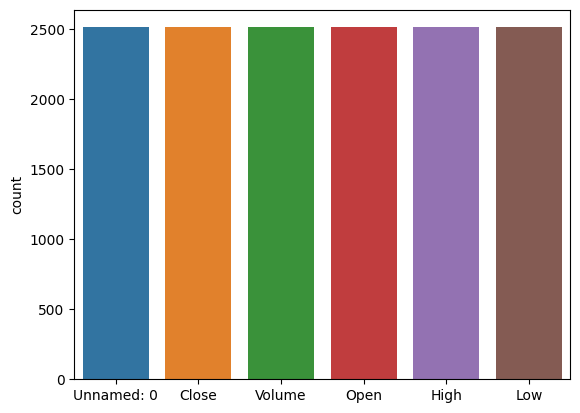

In [51]:
# PLOTTING THE COUNT PLOT TO SEE THE DISTRIBUTION
sns.countplot(data=df, palette='tab10')

#**SCATTER PLOT**

<Axes: >

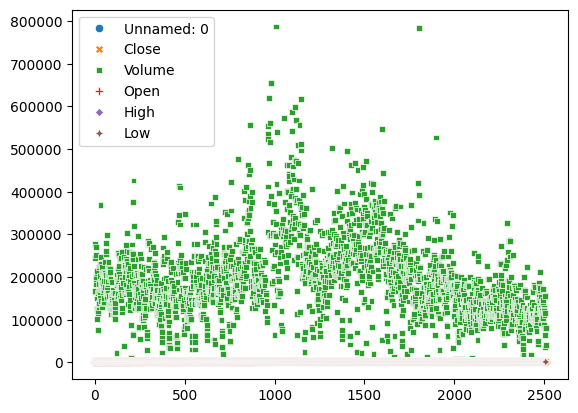

In [21]:
#HERE IS THE SCATTER PLOT
sns.scatterplot(data=df, palette='tab10')

#**PAIR PLOT**

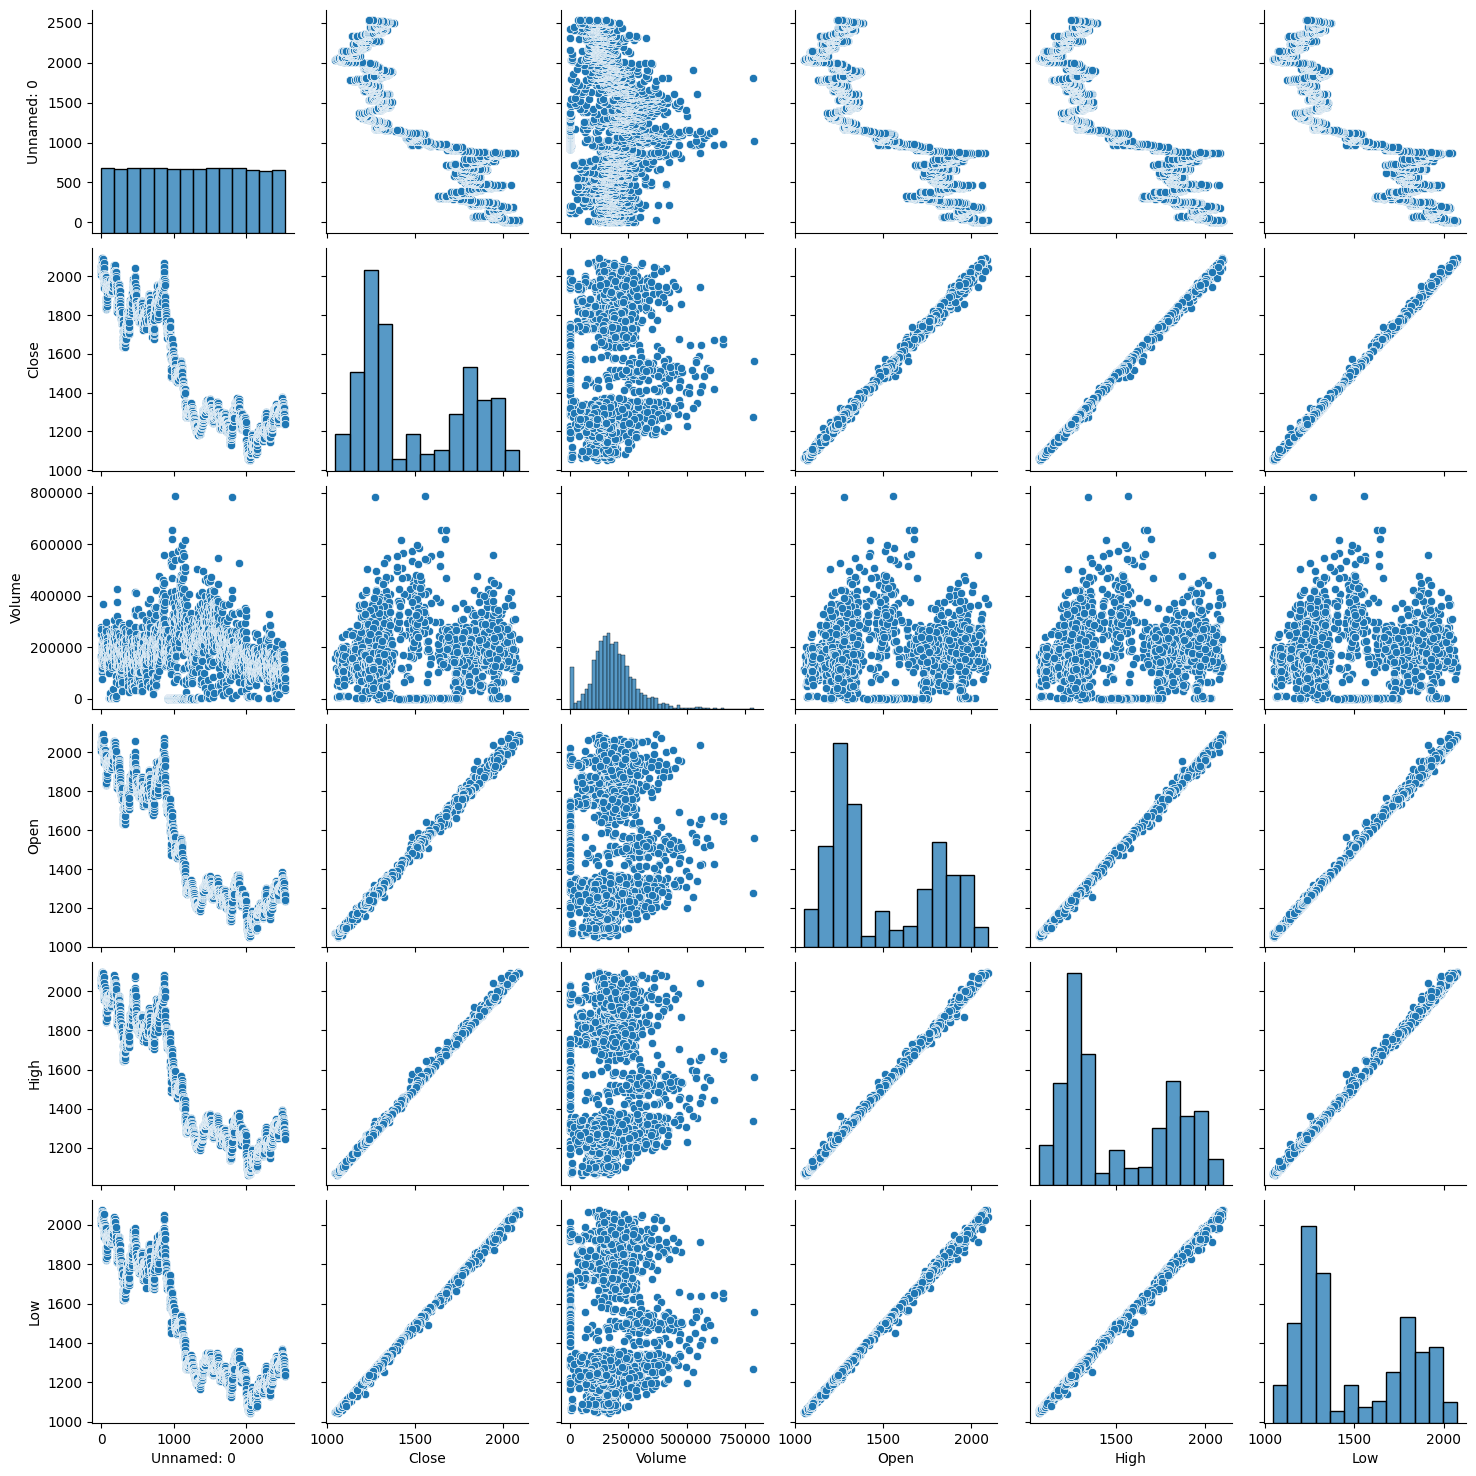

In [22]:
# LET'S SEE THE PAIR PLOT FOR OUR DATA
sns.pairplot(data=df, palette='tab10')

#**STRIP PLOT**

<Axes: >

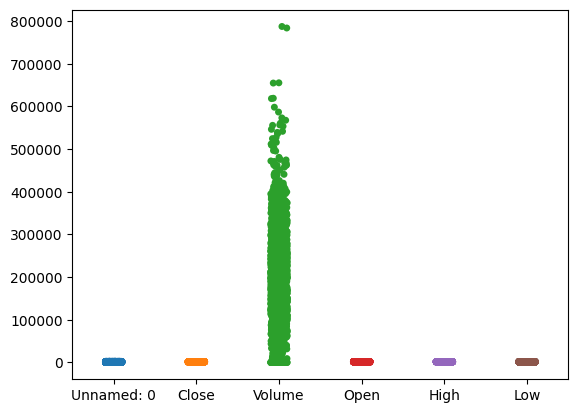

In [25]:
#**LET'S LOOK AT THE STRIP PLOT**
sns.stripplot(data=df, palette='tab10')

#**SEPARATING THE TARGET VARIABLE**

In [28]:
# HERE, WE ARE SEPARATING THE TARGET VARIABLE AND SAVING IT IN ANOTHER VARIABLE
X = df.drop(['Date', 'Open'], axis=1)
Y = df['Open']

In [29]:
print(X)

      Unnamed: 0   Close    Volume    High     Low
0              0  2029.3  166078.0  2041.9  2022.2
1              1  2021.6  167013.0  2025.6  2007.7
2              2  2006.5  245194.0  2036.1  2004.6
3              3  2030.2  277995.0  2062.8  2027.6
4              4  2051.6  250946.0  2067.3  2033.1
...          ...     ...       ...     ...     ...
2506        2528  1250.5   81426.0  1261.9  1248.0
2507        2529  1263.5   63419.0  1280.1  1252.0
2508        2530  1264.5   34998.0  1273.2  1256.9
2509        2531  1262.5   41697.0  1267.1  1230.8
2510        2532  1238.6   80262.0  1243.5  1235.5

[2511 rows x 5 columns]


In [30]:
print(Y)

0       2027.4
1       2009.1
2       2031.7
3       2053.4
4       2033.2
         ...  
2506    1254.9
2507    1269.9
2508    1264.3
2509    1235.1
2510    1240.5
Name: Open, Length: 2511, dtype: float64


#**TRAIN TEST SPLIT**

In [31]:
# WE ARE KEEPING 20% AS TEST DATA, AND 80% AS TRAIN DATA
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#**MODEL TRAINING**

#**RANDOM FOREST REGRESSOR**

In [39]:
# Training the Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

#**MODEL EVALUATION**

#**PREDICTING ON TEST DATA**

In [41]:
# LET'S SEE THE PREDICTION ON TEST DATA
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[2012.594 1273.307 1894.809 1563.956 1233.506 1824.458 1681.753 1237.503
 1900.725 1882.483 1266.161 1218.446 1206.15  1499.605 1199.059 1784.248
 1235.845 1515.481 1858.687 1838.296 1781.024 1945.801 1960.36  1193.837
 1320.538 1248.495 1219.145 1304.488 1813.107 1239.78  1857.352 1796.098
 1200.502 1114.36  1931.114 1800.505 1319.209 1176.179 1727.709 1881.369
 1498.401 1195.597 1300.843 1200.437 1783.582 1133.75  1741.573 1235.487
 1183.631 1248.352 1980.915 1218.458 1527.779 1295.993 1232.312 1324.727
 1265.12  1244.539 1780.649 1968.679 2048.725 1171.808 1287.762 1306.612
 1945.872 1193.967 1310.838 1323.289 1731.584 1804.468 1804.155 1763.874
 1904.029 1730.755 1285.89  1522.484 1851.874 1157.727 1215.238 1399.499
 1903.1   1189.444 1195.778 1230.942 1781.342 1636.721 1910.011 1205.914
 1436.067 1250.092 1350.838 1236.857 1290.517 1950.857 1790.091 1309.875
 1961.016 1328.178 2077.316 1226.997 1114.328 1349.561 1294.645 1583.514
 1300.749 1104.722 1323.826 1290.117 1213.898 1318.

#**LET'S CALCULATE R SQUARED ERROR**

In [42]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Error : ', error_score)

R Squared Error :  0.9992877828018359


###WE HAVE ACHEIVED A R SQUARED ERROR OF -----> 0.99

In [43]:
Y_test = list(Y_test)

#**VISUALIZING ACTUAL PRICE VS PREDICTED PRICE**

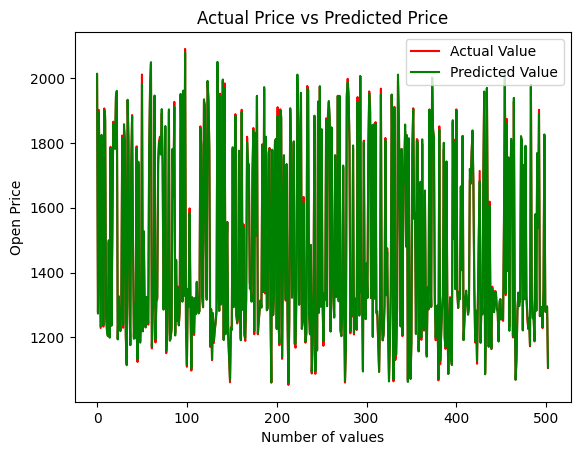

In [49]:
# PLOTTING THE ACTUAL PRICE VS PREDITED PRICE
plt.plot(Y_test, color='Red', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel('Open Price')
plt.legend()
plt.show()

#**XGBOOST REGRESSOR**

In [52]:
# loading the model
from xgboost import XGBRegressor
model = XGBRegressor()

In [53]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#**MODEL EVALUATION**

#**PREDICTING ON TRAINING DATA**

In [54]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [55]:
print(training_data_prediction)

[1767.9135 1157.3545 1297.7545 ... 1542.1561 1228.7329 1290.8707]


#**CHECKING FOR MEAN SQURE AND R SQUARED ERROR**

In [56]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999254818979438
Mean Absolute Error :  1.9553038699693435


#**VISUALIZING THE ACTUAL PRICE VS PRIDICTED PRICE**

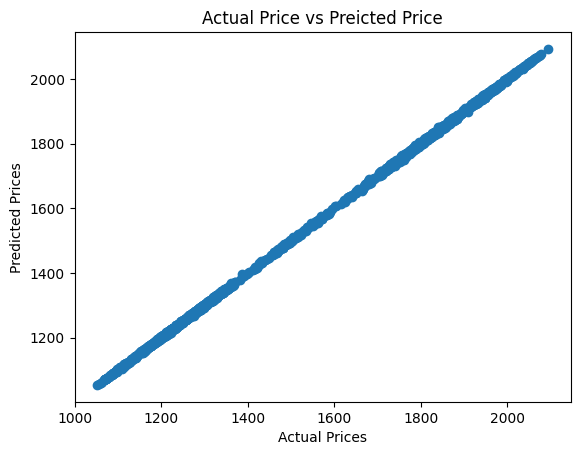

In [57]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

#**PREDICTION ON TEST DATA**

In [58]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [59]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9991323797218395
Mean Absolute Error :  5.949625392178183
